In [1]:
%matplotlib notebook

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as wdg
from IPython.display import display

# Gradenfit

## Beispiel: Ursprungsgrade

In [15]:
x = np.array([0.3, 2., 3., 4., 5])
y = x*1.1 + np.array([0.1, -0.2, -0.15, 0.3, 0.25])

In [16]:
def cost(x, y, a):
    return np.sum((a * x - y)**2)

In [52]:
reg_ugr = LinearRegression(fit_intercept=False).fit(x[:,np.newaxis],y)
x_sol_ugr = np.linspace(0,5,100)
y_sol_ugr = reg_ugr.predict(x_sol_ugr.reshape(-1, 1))

<IPython.core.display.Javascript object>


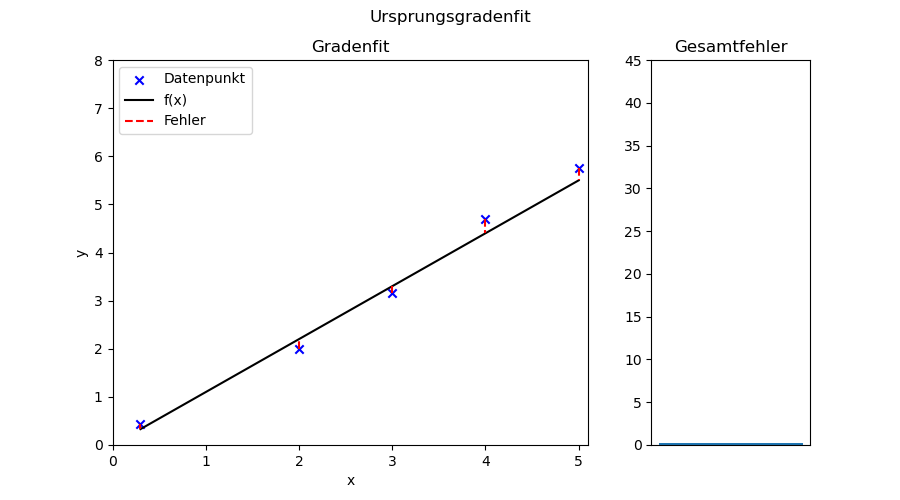

interactive(children=(FloatSlider(value=0.5, description='Steigung:', max=2.0, min=0.1), Checkbox(value=False,…

In [73]:
fig_ugr, (ax_ugr, ax_ugr_fehler) = plt.subplots(1,2, figsize=(9, 5), gridspec_kw={'width_ratios': [3, 1]})
fig_ugr.suptitle('Ursprungsgradenfit')

@wdg.interact(a=wdg.FloatSlider(min=0.1, max=2, steps=10, value=0.5, description='Steigung:'),
             loesung=wdg.Checkbox(description='Lösung'))
def plot_line(a, loesung):
    ax_ugr.clear()
    ax_ugr.set_title('Gradenfit')
    if loesung:
        ax_ugr.plot(x_sol_ugr, y_sol_ugr)
    ax_ugr.scatter(x, y, marker='x', label='Datenpunkt', color='b')
    ax_ugr.plot(x, a*x, linestyle='-', label='f(x)', color='k')
    ax_ugr.set_ylim([0,8])
    ax_ugr.set_xlim([0,5.1])
    ax_ugr.set_xlabel('x')
    ax_ugr.set_ylabel('y')
    for i in range(x.shape[0]):
        ax_ugr.vlines(x[i], y[i], a *x[i], color='r', label='Fehler' if i==0 else None, linestyle='--')
    ax_ugr.legend(loc='upper left')
    ax_ugr_fehler.clear()
    ax_ugr_fehler.set_title('Gesamtfehler')
    ax_ugr_fehler.bar(1, cost(x, y, a))
    ax_ugr_fehler.set_ylim([0, 45])
    ax_ugr_fehler.get_xaxis().set_visible(False)
    plt.show()
    

# Quadratische Gleichungen
Wir lösen die Gleichung:
$$ x^2 + px + q = 0$$


<IPython.core.display.Javascript object>


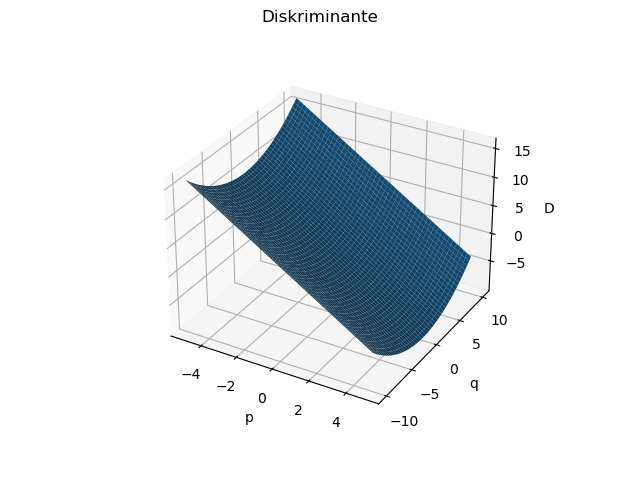

Text(0.5, 0, 'D')

In [94]:
fig_disc = plt.figure()
ax_disc = fig_disc.add_subplot(111, projection='3d')
fig_disc.suptitle('Diskriminante')

x_disc = np.linspace(-5,5 , 50)
y_disc = np.linspace(-10, 10, 50)
x_disc_, y_disc_ = np.meshgrid(x_disc, y_disc)
d = np.array([[(p/2)**2 - q for q in y_disc] for p in x_disc])
d_ = d.reshape(x_disc_.shape)

#ax_disc.plot_surface(x_disc_, y_disc_, 0*d_, alpha=0.5)
ax_disc.plot_surface(x_disc_, y_disc_, d_)
ax_disc.set_xlabel('p')
ax_disc.set_ylabel('q')
ax_disc.set_zlabel('D')

<IPython.core.display.Javascript object>


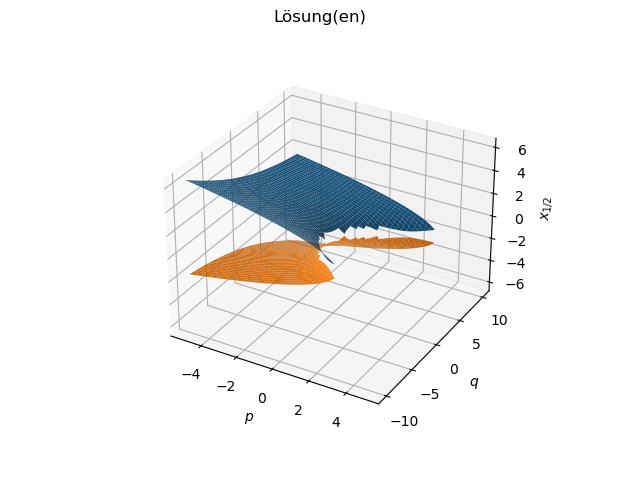

In [96]:
fig_loes = plt.figure()
ax_loes = fig_loes.add_subplot(111, projection='3d')
fig_loes.suptitle('Lösung(en)')

loes1 = np.array([[ -p/2 + np.sqrt((p/2)**2 - q) if (p/2)**2 - q >=0 else np.nan for q in y_disc] for p in x_disc])
loes2 = np.array([[ -p/2 - np.sqrt((p/2)**2 - q) if (p/2)**2 - q >=0 else np.nan for q in y_disc] for p in x_disc])
loes1_ = d.reshape(x_disc_.shape)
loes2_ = d.reshape(x_disc_.shape)

ax_loes.plot_surface(x_disc_, y_disc_, loes1)
ax_loes.plot_surface(x_disc_, y_disc_, loes2)
ax_loes.set_xlabel('$p$')
ax_loes.set_ylabel('$q$')
ax_loes.set_zlabel('$x_{1/2}$')
plt.show()